In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *
sns.set_style("whitegrid")

In [3]:
users_exp = pd.read_pickle("users.dat")

In [6]:
user1_1, user1_2, user2_1, user2_2, user3_1, user3_2, user4_1, user4_2 = users_exp

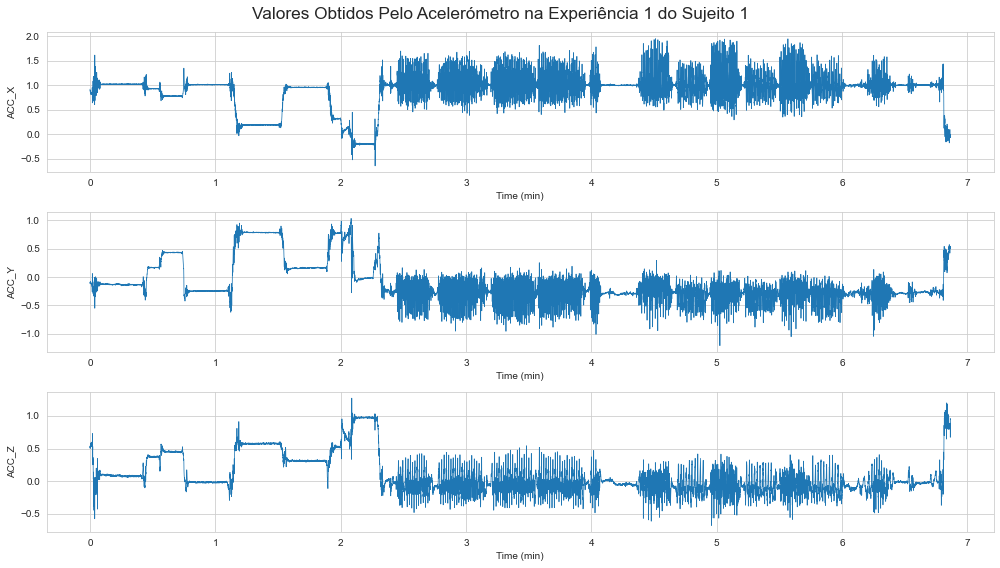

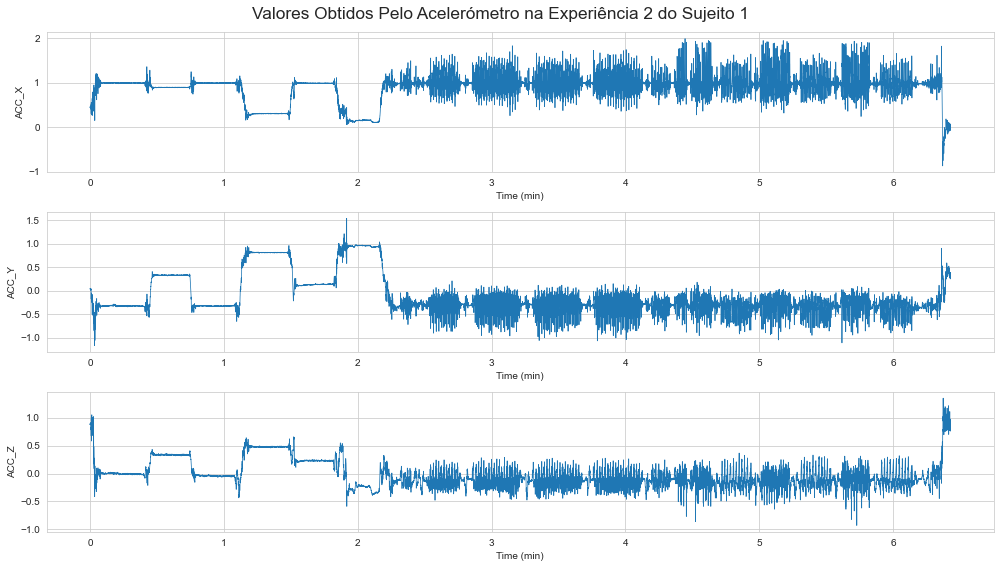

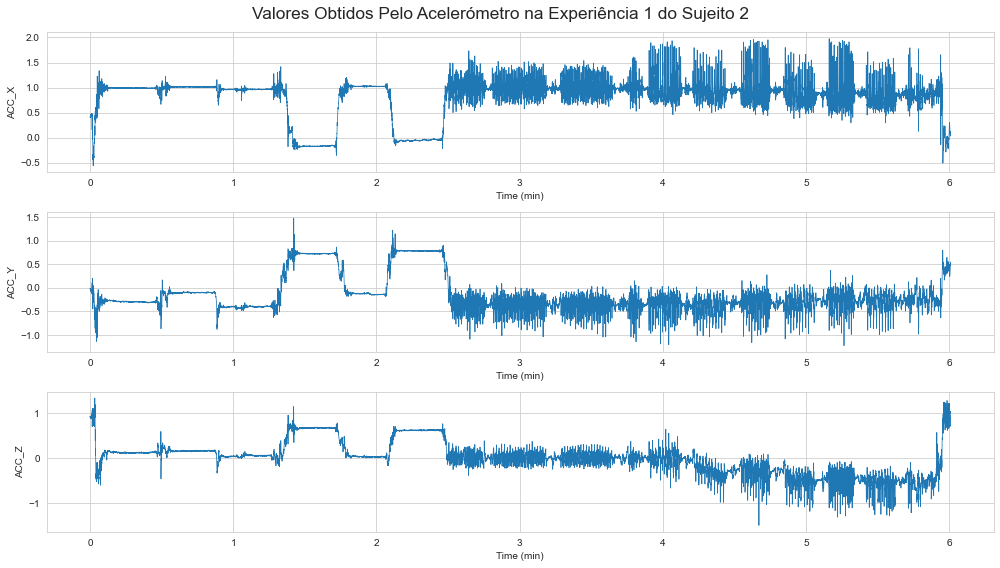

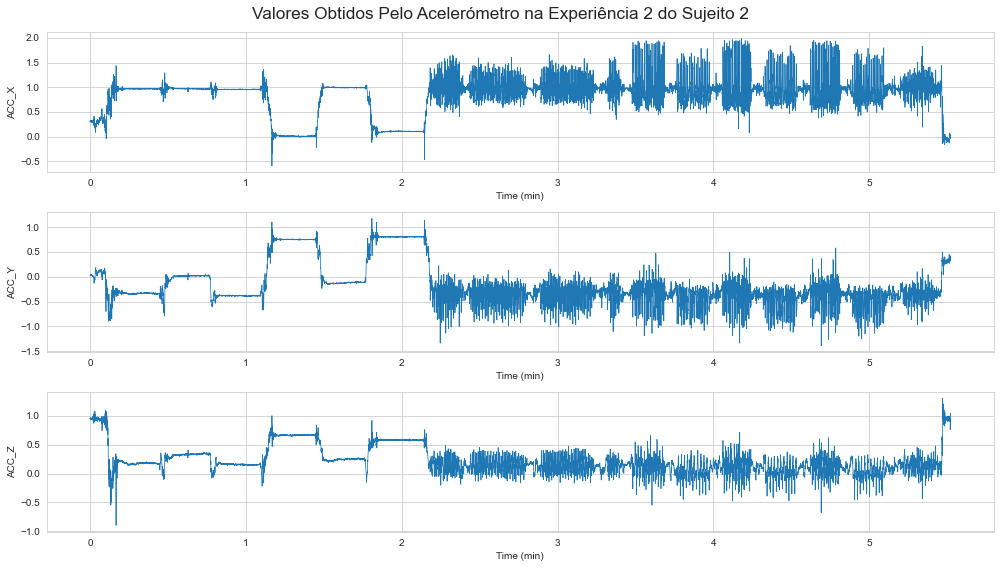

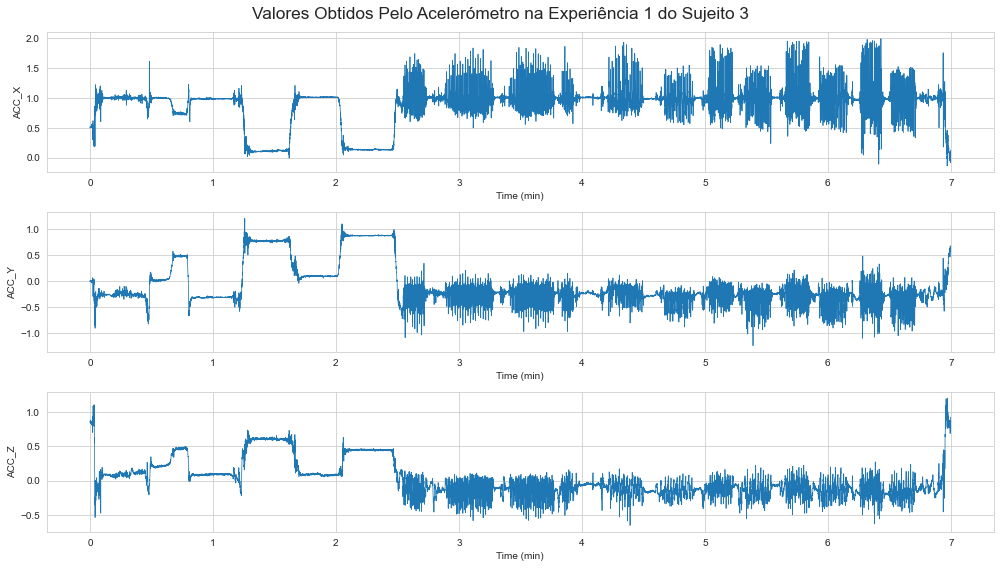

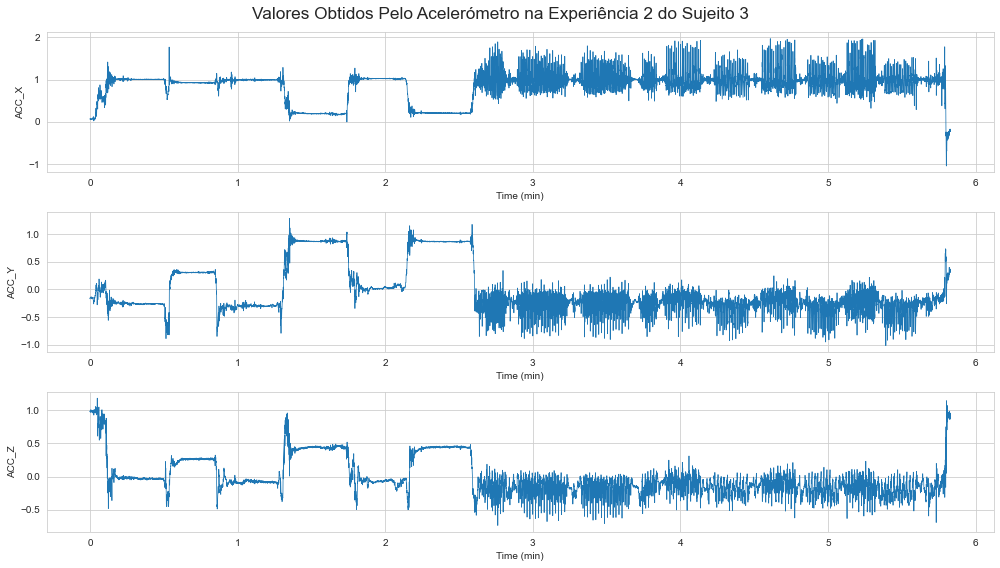

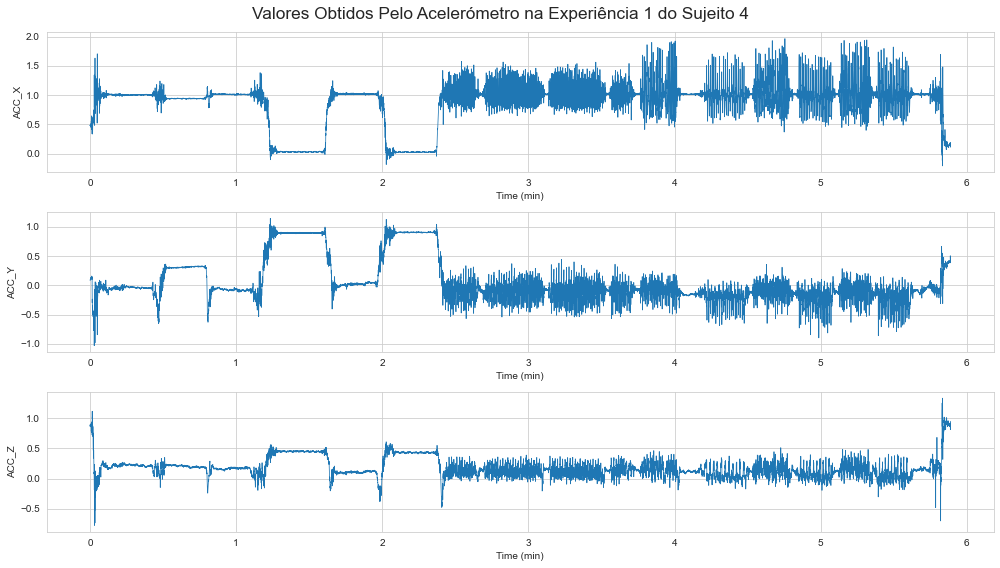

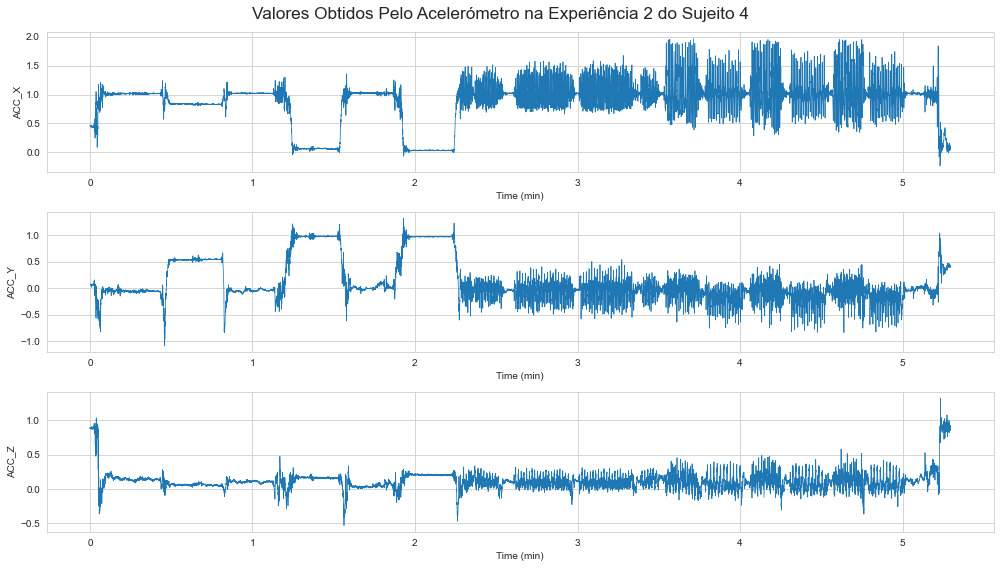

In [24]:
for i in range(len(users_exp)):
    user = users_exp[i]
    
    figure, plots = plt.subplots(nrows=3, ncols=1, figsize=(14,8))
    figure.suptitle(f"Valores Obtidos Pelo Acelerómetro na Experiência {i%2+1} do Sujeito {i//2+1}", fontsize = 'xx-large')
    
    fig_now = sns.lineplot( x='Time (min)', y = 'X', data = user, size = 0.01, legend = False, ax=plots[0])
    fig_now.set_xlabel("Time (min)")
    fig_now.set_ylabel("ACC_X")
    #plt.title("Variação das Acelerações no Eixo X")

    fig_now = sns.lineplot( x='Time (min)', y = 'Y', data = user, size = 0.01, legend = False, ax=plots[1])
    fig_now.set_xlabel("Time (min)")
    fig_now.set_ylabel("ACC_Y")

    #plt.title("Variação das Acelerações no Eixo Y")

    fig_now = sns.lineplot( x='Time (min)', y = 'Z', data = user, size = 0.01, legend = False, ax = plots[2])
    fig_now.set_xlabel("Time (min)")
    fig_now.set_ylabel("ACC_Z")
    #plt.title("Variação das Acelerações no Eixo Z")

    figure.tight_layout()
    #print("\n\n")